## Datenaufbereitung / Visualisierung
Der Wetterdatensatz beinhaltet historische Wetterdaten aus dem Jahr 2012 für Montreal. 

## Bibliotheken laden
Alle notwendigen Bibliotheken für die Bearbeitung der Daten werden importiert.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## 1. Daten einlesen
Der Datensatz wird mithilfe der Bibliothek "pandas" eingelesen.

In [2]:
df = pd.read_csv("wetterdaten.csv") 
df.head(24)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8735 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## 2. Datenbereinigung
Auffällige Werte werden aus diesem Datensatz entfernt (NAs oder Ausreißer).
Zu beginn wird eine graphische Darstellung der Werte mithilfe der pandas-Funktion iloc erstellt.
Daraufhin werden mögliche Null Values ersetzt und Outliers erfasst.




/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.6/sit

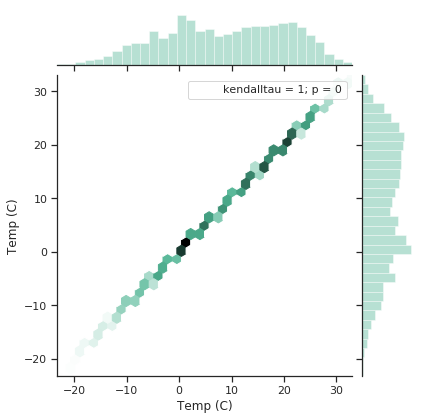

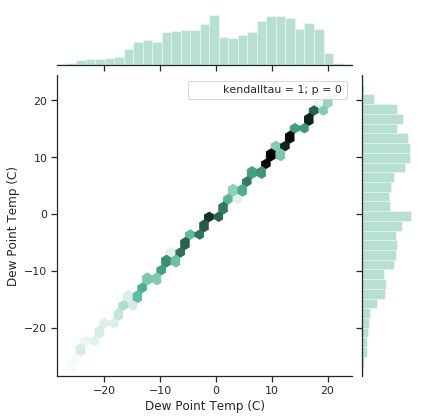

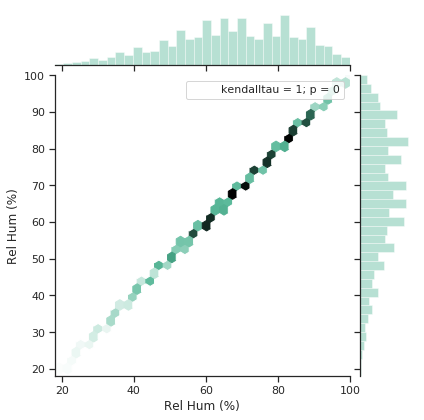

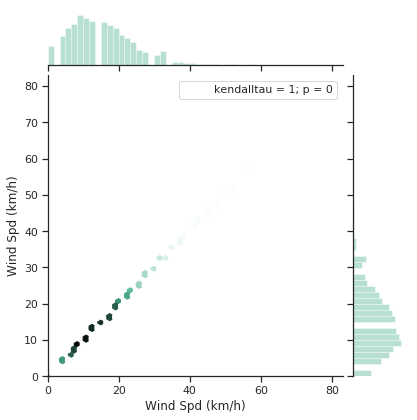

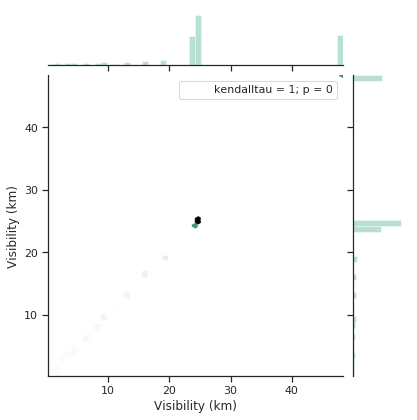

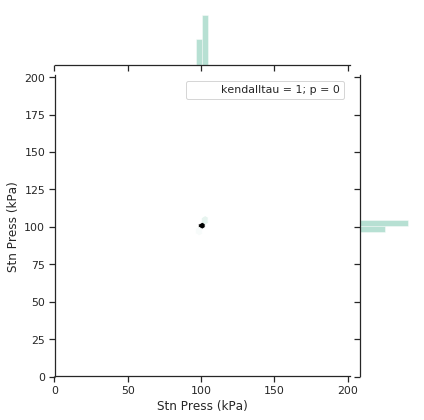

In [4]:
# df.apply(set)
dateTimeColValues = df.iloc[:,0]
tempColValues = df.iloc[:,1]
dewPointColValues = df.iloc[:,2]
relHunColValues = df.iloc[:,3]
windSpdColValues = df.iloc[:,4]
visibilityColValues = df.iloc[:,5]
stnPressColValues = df.iloc[:,6]
weatherColValues = df.iloc[:,7]

sns.set(style="ticks")

sns.jointplot(df.iloc[:,1], df.iloc[:,1], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(df.iloc[:,2], df.iloc[:,2], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(df.iloc[:,3], df.iloc[:,3], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(df.iloc[:,4], df.iloc[:,4], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(df.iloc[:,5], df.iloc[:,5], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(df.iloc[:,6], df.iloc[:,6], kind="hex", stat_func=kendalltau, color="#4CB391") 


## 2.1. Fehlende Daten
Mögliche Null Values werden durch den Mittelwert (median) ersetzt.

In [5]:
df = df.fillna(df.median())

## 2.2. Outlier handling
### Outlier in den Daten bereinigen. 
In unserem Fall haben wir Ausreißer durch Pseudo-Daten generiert.  
Die Ausreißer wurden durch den Mittelwert imputiert.

In [6]:
for i in range(0,8):
    
    if(isinstance(df.iloc[1,i], (int, float, complex))) :

        cols = df.iloc[1:,i]
        elements = np.array(cols)

        mean = np.mean(elements, axis=0)
        sd = np.std(elements, axis=0)
        
        temp = []
        for a in cols:
            if (a > mean - 2 * sd) :
                temp.append(a)
            elif (a < mean + 2 * sd):
                temp.append(a)
            else :
                temp.append(mean)
        
        df.iloc[1:,i] = temp

df.describe()
 

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.735474,2.555294,67.431694,14.945469,27.664447,101.099438
std,11.652171,10.883072,16.918881,8.688696,12.622688,6.927972
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,0.140000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.550000
50%,9.200000,3.300000,68.000000,13.000000,25.000000,101.080000
75%,18.700000,11.800000,81.000000,20.000000,25.000000,101.600000
max,33.000000,24.400000,100.000000,83.000000,48.300000,201.370000


## 2.3. Korrelation

Die Beziehung (Korrelation) zwischen je zwei Variablen wird visualisiert.

In [7]:
df.corr() 

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Temp (C),1.000000,0.928953,-0.222005,-0.061436,0.275635,-0.153054
Dew Point Temp (C),0.928953,1.000000,0.139494,-0.095685,0.050813,-0.143888
Rel Hum (%),-0.222005,0.139494,1.000000,-0.092743,-0.633683,0.042209
Wind Spd (km/h),-0.061436,-0.095685,-0.092743,1.000000,0.004883,-0.002792
Visibility (km),0.275635,0.050813,-0.633683,0.004883,1.000000,0.007722
Stn Press (kPa),-0.153054,-0.143888,0.042209,-0.002792,0.007722,1.000000


## 2.4. Datenaggregation
Die Mininmal-, Maximal und Durchschnittswerte der numerischen Spalten pro Tag werden ermittelt.

In [8]:
df.describe() 
neu = {}

for i in range(0,8):
    if(isinstance(df.iloc[1,i], (int, float, complex))) :  
        neu[list(df)[i]] = { 'mean': np.mean(df.iloc[:,i]) , 'min' : df.iloc[:,i].min(), 'max' : df.iloc[:,i].max() }

t = pd.DataFrame(neu)
t

,Temp (C),Dew Point Temp (C),Visibility (km),Stn Press (kPa)
mean,8.735474,2.555294,27.664447,101.099438
min,-23.300000,-28.500000,0.200000,0.140000
max,33.000000,24.400000,48.300000,201.370000


Die tägliche Durschnittstemperatur über den Jahresverlauf wird visualisiert. 

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date/Time')

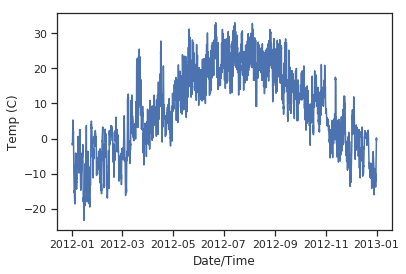

In [9]:
df.index = pd.to_datetime(df['Date/Time'])

df['Temp (C)'].resample('D').mean()



fig, ax = plt.subplots()
ax.plot(df.index, df['Temp (C)'])
plt.ylabel('Temp (C)')
plt.xlabel('Date/Time')

In [10]:
date_Temp_matrix = df[['Temp (C)']].resample('D').mean()
date_Temp_matrix

,Temp (C)
Date/Time,
2012-01-01,0.629167
2012-01-02,0.041667
2012-01-03,-14.416667
2012-01-04,-13.645833
2012-01-05,-6.750000
...,...
2012-12-27,-5.833333
2012-12-28,-6.775000
2012-12-29,-11.345833


## 2.5. Kategorisierung der Windstärke
Die Windstärke wird oftmals in Kategorien der Beaufort-Skala angegeben. Daher werden in einer neuen Variablen die numerischen Werte der maximalen Windgeschwindigkeit in Kategorien der Beaufort-Skala umgewandelt. 
Das Diagramm stellt die Anzahl der Tage je Kategorie dar.

Text(0.5, 0, 'Wind Spd (km/h)')

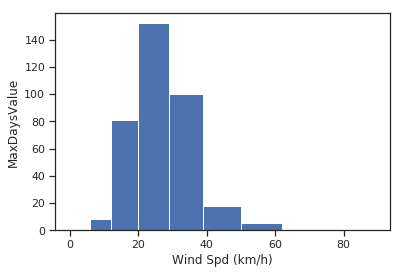

In [11]:
# Stufe 0    0
# Stufe 1    1 − 5
# Stufe 2    6 − 11
# Stufe 3    12 − 19
# Stufe 4    20 − 28
# Stufe 5    29 − 38
# Stufe 6    39 − 49
# Stufe 7    50 − 61
# Stufe 8    62 − 74
# Stufe 9    75 − 88

columnName = 'Wind Spd (km/h)'
daysMaxValues = df[columnName].resample('D').max()
bins= [0,1,6,12,20,29,39,50,62,75,89]
categories = pd.cut(daysMaxValues, bins)
df_cat = pd.DataFrame(categories)
df_cat.groupby(columnName)[columnName].count()

plt.hist(daysMaxValues, bins = bins)
plt.ylabel('MaxDaysValue')
plt.xlabel('Wind Spd (km/h)')

## 2.6. Ermittlung des Wetters 
Die Spalte 'Weather' des Originaldataframes ist string-codiert. Daher werden die einzelnen Zellen, nach Wetterphänomenen gesplitted und die Häufigkeiten werden aufgezählt. 
Die fehlende Wert werden behandelt.
Dieser Datensatz wird mit dem vorherigen Datensatz (der die aggregierten Werten enthält) gejoint. 

In [12]:
weather = [[df.index[x].floor('D'), df['Weather'].iloc[x].split(',')] for x in range(len(df))]
dict_weather={}
for i in range(len(df)-1):
    for value in weather[i][1]:
        try:
            dict_weather[weather[i][0]].append(value)
        except KeyError:
            dict_weather[weather[i][0]] = [value]

weather_counts={}
for day in dict_weather.keys():
    count_weather_day = {}
    for value in dict_weather[day]:
        count_weather_day[value] = count_weather_day.get(value, 0) + 1
    weather_counts[day]=count_weather_day

df_weather=pd.DataFrame(weather_counts).T

In [13]:
df_weather

,Fog,Freezing Drizzle,Mostly Cloudy,Cloudy,Rain,Rain Showers,Mainly Clear,Snow Showers,Snow,Clear,...,Blowing Snow,Freezing Fog,Haze,Drizzle,Ice Pellets,Thunderstorms,Heavy Rain Showers,Moderate Rain Showers,Snow Pellets,Moderate Rain
2012-01-01,16.0,2.0,1.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,16.0,2.0,NaN,1.0,1.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,6.0,3.0,NaN,NaN,8.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,5.0,3.0,NaN,NaN,5.0,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,2.0,NaN,NaN,9.0,NaN,9.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,17.0,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-28,NaN,3.0,2.0,3.0,NaN,NaN,13.0,NaN,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-29,19.0,NaN,NaN,2.0,NaN,NaN,1.0,3.0,10.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-30,7.0,NaN,4.0,4.0,NaN,NaN,8.0,NaN,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.7. Datenvorbereitung für KNN
Die Spalte "weather" wird so gefiltert, jeder Wettertyp einmal ausgegeben wird.
Da diese in einer Zeile mehrere Wettertypen vorkommen können müssen diese noch getrennt werden, sodass jeder Wettertyp nur einmal vorhanden ist.

In [14]:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [15]:
#Split Label into targets and only use first weather description
df['Weather'] = df['Weather'].apply(lambda x: x.split(',')).apply(lambda x: x[0])

In [16]:
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain', 'Moderate Snow', 'Freezing Fog', 'Haze',
       'Drizzle', 'Thunderstorms', 'Snow Pellets', 'Moderate Rain'],
      dtype=object)

In [17]:
unique_col_count = np.unique(df['Weather'], return_counts=True)[1]
unique_col = np.unique(df['Weather'], return_counts=True)[0]
unique_col_count, unique_col

(array([1326, 1728,  139,  150,   27,    4,   22,   16, 2106,    1,    6,
        2069,  450,  191,  457,    1,   64,   27]),
 array(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Freezing Drizzle',
        'Freezing Fog', 'Freezing Rain', 'Haze', 'Mainly Clear',
        'Moderate Rain', 'Moderate Snow', 'Mostly Cloudy', 'Rain',
        'Rain Showers', 'Snow', 'Snow Pellets', 'Snow Showers',
        'Thunderstorms'], dtype=object))

In [18]:
#Drop labels that appear less than 50 times in the dataset
df['Weather'] = df['Weather'].apply(lambda x: x if x in unique_col[unique_col_count > 50] else None)
df = df.dropna()

## 2.8. Label Encoder 
Wörter werden mit dem Label Encoder umgewandelt, sodass sie vom Algorithmus verstanden werden.
'wort'-label werden zu 'zahlen'-label umgewandelt.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [19]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(['Weather', 'Date/Time'], axis=1)
y = LabelEncoder().fit_transform(df['Weather'])

## 2.9. Aufteilen des Datensatz 
Der Datensatz wir Trainings und Test Daten aufgeteilt. Dies dient dazu, die Trainigsdaten mithilfe der Testdaten zu validieren. 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

datenpunkte * spalten

In [21]:
X.shape, X_train.shape, X_test.shape

((8680, 6), (6944, 6), (1736, 6))

# 3. Datenbearbeitung


Um eine Wettervorhersage treffen zu können nutzen wir überwachtes lernen (supervised learning), das heißt der Algorithmus lernt eine Funktion aus gegebenen Paaren von Ein- und Ausgaben. Ziel beim überwachten Lernen ist, dass dem Netz nach mehreren Rechengängen mit unterschiedlichen Ein- und Ausgaben die Fähigkeit antrainiert wird, Assoziationen herzustellen [Quelle: https://de.wikipedia.org/wiki/Maschinelles_Lernen#Überwachtes_Lernen].


## 3.1 k-Nearest-Neighbor-Algorithmus (KNN)

Wir nutzen den k-Nearest-Neighbor-Algorithmus mithilfe der Pythonbibliothek Sklearn.

Sklearn Model API: <br>
.fit(X_train, y_train) -> training, <br>
.score(X_test, y_test) -> evaluieren, <br>
.predict(X_test) -> vorhersagen

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.5936059907834101

### Precision und Recall Methoden von sklearn
Precision-Recall ist ein nützliches Maß für den Erfolg der Vorhersage, wenn die Klassen sehr unausgewogen sind. Beim Abrufen von Informationen ist die Genauigkeit (precision) ein Maß für die Relevanz der Ergebnisse, während der Rückruf (recall) ein Maß dafür ist, wie viele wirklich relevante Ergebnisse zurückgegeben werden.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [23]:
from sklearn.metrics import precision_score, recall_score

y_pred = knn.predict(X_test)

'Precision', precision_score(y_test, y_pred, average='macro'), 'Recall', recall_score(y_test, y_pred, average='macro')

('Precision', 0.40211900142705115, 'Recall', 0.37939923979974044)

In [24]:
knn.score(X_test, y_test)

0.4153225806451613

In [25]:
max_depths = []
train_scores = []
test_scores = []

for i in range(3, 25, 2):
    
    max_depths.append(i)
    
    rfc = KNeighborsClassifier(n_neighbors=i)
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train)
    train_scores.append(train_score)
    
    test_score = rfc.score(X_test, y_test)
    test_scores.append(test_score)
    
    print(f'Max Depth {i}, Train Score {train_score}, Test Score {test_score}')

Max Depth 3, Train Score 0.6483294930875576, Test Score 0.3922811059907834
Max Depth 5, Train Score 0.5936059907834101, Test Score 0.4153225806451613
Max Depth 7, Train Score 0.5591877880184332, Test Score 0.41013824884792627
Max Depth 9, Train Score 0.5400345622119815, Test Score 0.40956221198156684
Max Depth 11, Train Score 0.530241935483871, Test Score 0.4176267281105991
Max Depth 13, Train Score 0.5184331797235023, Test Score 0.4049539170506912
Max Depth 15, Train Score 0.5082085253456221, Test Score 0.4049539170506912
Max Depth 17, Train Score 0.49855990783410137, Test Score 0.4084101382488479
Max Depth 19, Train Score 0.49035138248847926, Test Score 0.4112903225806452
Max Depth 21, Train Score 0.483294930875576, Test Score 0.4078341013824885
Max Depth 23, Train Score 0.4814228110599078, Test Score 0.40956221198156684


Seaborn ist ein package, welches auf matplotlib aufsetzt und welches einfache Methoden zur Visualisierung bietet.
Dies nutzen wir um die Ausgabe der accuracy in Bezug auf die Anzahl der betrachteten Nachbarn zu visualisieren.

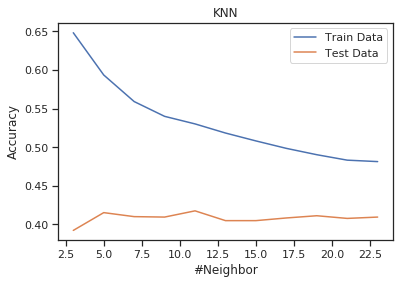

In [26]:
sns.lineplot(x=max_depths, y=train_scores, label="Train Data")
sns.lineplot(x=max_depths, y=test_scores, label="Test Data")
plt.title("KNN")
plt.xlabel("#Neighbor")
plt.ylabel("Accuracy")
plt.legend()

## 3.2 Random Forest Classifier
Eine random forest classifier ist ein Meta-Schätzer, der eine Reihe von Entscheidungsbaumklassifizierern auf verschiedene Teilstichproben des Datensatzes anpasst und die Mittelwertbildung verwendet, um die Vorhersagegenauigkeit zu verbessern und die Überanpassung zu steuern. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=20)

rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9783986175115207

In [28]:
y_pred = rfc.predict(X_test)

'Precision', precision_score(y_test, y_pred, average='macro'), 'Recall', recall_score(y_test, y_pred, average='macro')

('Precision', 0.5157347070975419, 'Recall', 0.46751747719207043)

In [29]:
rfc.score(X_test, y_test)

0.5017281105990783

Random Forest Grid Search

In [30]:
max_depths = []
train_scores = []
test_scores = []

for i in range(5, 27, 3):
    
    max_depths.append(i)
    
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(X_train, y_train)
    
    train_score = rfc.score(X_train, y_train)
    train_scores.append(train_score)
    
    test_score = rfc.score(X_test, y_test)
    test_scores.append(test_score)
    
    print(f'Max Depth {i}, Train Score {train_score}, Test Score {test_score}')

Max Depth 5, Train Score 0.45377304147465436, Test Score 0.4130184331797235
Max Depth 8, Train Score 0.5622119815668203, Test Score 0.44873271889400923
Max Depth 11, Train Score 0.7485599078341014, Test Score 0.47235023041474655
Max Depth 14, Train Score 0.8922811059907834, Test Score 0.5097926267281107
Max Depth 17, Train Score 0.9644297235023042, Test Score 0.49539170506912444
Max Depth 20, Train Score 0.980270737327189, Test Score 0.505184331797235
Max Depth 23, Train Score 0.9841589861751152, Test Score 0.4971198156682028
Max Depth 26, Train Score 0.9861751152073732, Test Score 0.49539170506912444


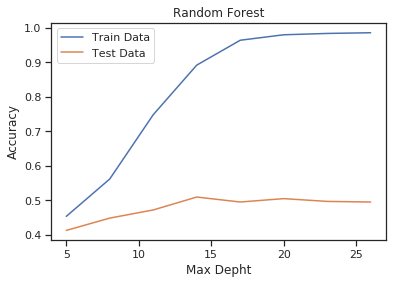

In [31]:
sns.lineplot(x=max_depths, y=train_scores, label="Train Data")
sns.lineplot(x=max_depths, y=test_scores, label="Test Data")
plt.title("Random Forest")
plt.xlabel("Max Depht")
plt.ylabel("Accuracy")
plt.legend()